# 23-1 Maching Learning Term project (Final)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn
import statsmodels.formula.api as smf

In [217]:
# Preprocessing
data = pd.DataFrame(columns=['IsCorrect_mean', 'Confidence'])

# IsCorrect의 평균 계산
train_task_data = pd.read_csv('data/train_data/train_task_3_4.csv')
for k,df in train_task_data.groupby('QuestionId'):
    data.loc[k] = df['IsCorrect'].mean(), 0

# Confidence가 없는 데이터에 Confidence의 평균값을 대입
answer_metadata = pd.read_csv('data/meta_data/answer_metadata_task_3_4.csv')

# Confidence 열이 NaN인 행 찾기
nan_rows = answer_metadata[answer_metadata['Confidence'].isna()]
confidence_mean = answer_metadata.loc[~answer_metadata['Confidence'].isna(), 'Confidence'].mean()
answer_metadata.loc[nan_rows.index, 'Confidence'] = confidence_mean

# AnswerId를 1:1 매핑하여 QuestionId AnswerId Confidence 속성으로 구성된 새로운 DataFrame 생성
merged_data = pd.merge(train_task_data, answer_metadata, on='AnswerId')[['QuestionId', 'AnswerId', 'Confidence']]
merged_data = merged_data.groupby(['QuestionId', 'AnswerId']).mean().reset_index()

In [290]:
# data DataFrame의 Confidence 열 채우기
# [참고] Colab 기준, 4분 정도의 시간이 걸립니다.
for i, row in merged_data.iterrows():
    data.loc[row['QuestionId'], 'Confidence'] = row['Confidence'] - np.random.randint(confidence_mean)

data

,IsCorrect_mean,Confidence
0,0.443457,63.608704
1,0.571429,27.608704
2,0.385214,62.608704
3,0.808757,20.608704
4,0.401408,74.000000
...,...,...
943,0.566528,44.608704
944,0.142857,19.608704
945,0.422336,14.608704
946,0.459459,58.608704


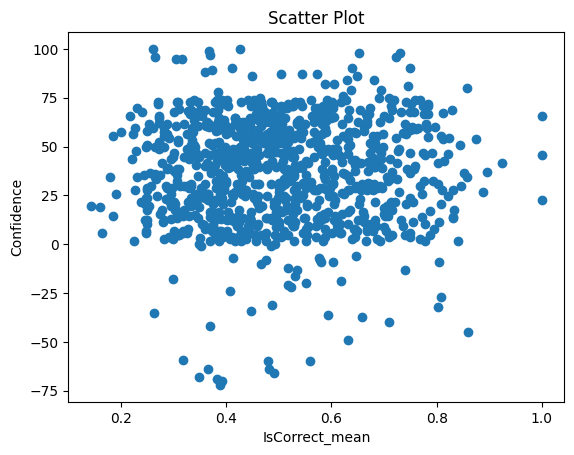

In [291]:
# IsCorrect_mean 과 Confidence scatter plot
plt.scatter(data['IsCorrect_mean'], data['Confidence'])
plt.xlabel('IsCorrect_mean')
plt.ylabel('Confidence')
plt.title('Scatter Plot')
plt.show()

In [306]:
# K-means를 사용한 군집화
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=1).fit(data[['IsCorrect_mean', 'Confidence']])

kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,

Text(0.5, 1.0, 'Scatter Plot')

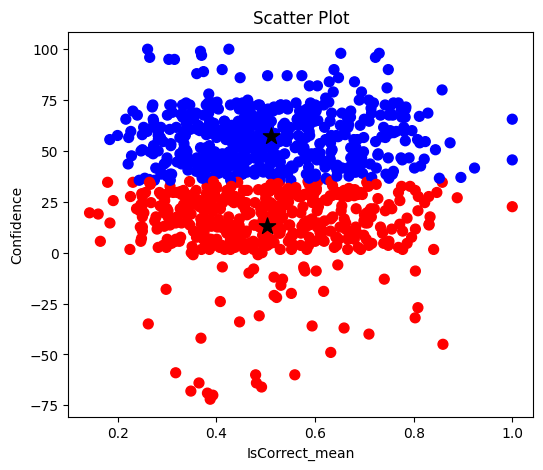

In [307]:
# K=2 일때 scatter plot
plt.figure(figsize=(6,5))
plt.scatter(data['IsCorrect_mean'], data['Confidence'], s=50, c=kmeans.labels_, cmap=plt.cm.bwr)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker = '*',
            s = 150,
            color = 'k')
plt.xlabel('IsCorrect_mean')
plt.ylabel('Confidence')
plt.title('Scatter Plot')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Scatter Plot')

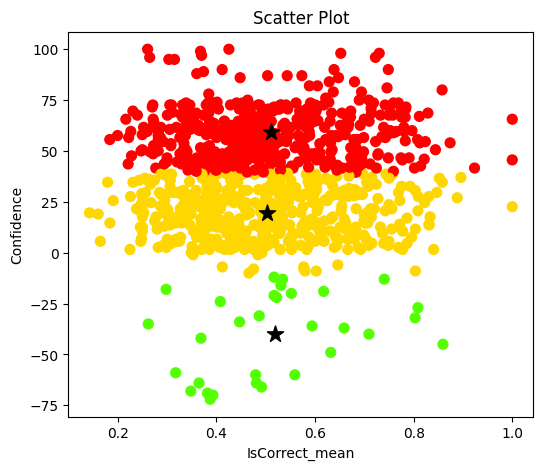

In [294]:
# K=3 일때 scatter plot

kmeans = KMeans(n_clusters=3, random_state=1).fit(data[['IsCorrect_mean', 'Confidence']])

plt.figure(figsize=(6,5))
plt.scatter(data['IsCorrect_mean'], data['Confidence'], s=50, c=kmeans.labels_, cmap=plt.cm.prism)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker = '*',
            s = 150,
            color = 'k')
plt.xlabel('IsCorrect_mean')
plt.ylabel('Confidence')
plt.title('Scatter Plot')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Scatter Plot')

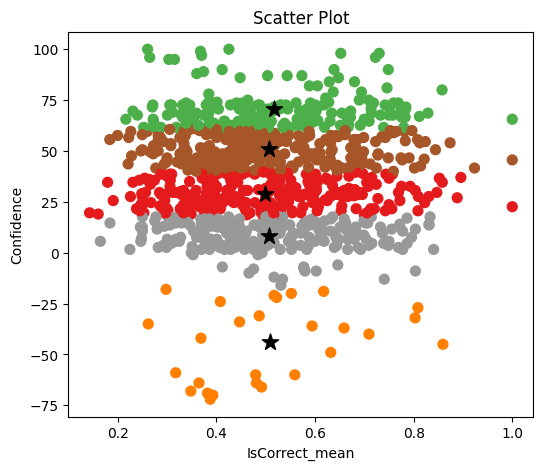

In [375]:
# K=N_clusters 일때 scatter plot
N_clusters = 5

kmeans = KMeans(n_clusters=N_clusters, random_state=200).fit(data[['IsCorrect_mean', 'Confidence']])

plt.figure(figsize=(6,5))
plt.scatter(data['IsCorrect_mean'], data['Confidence'], s=50, c=kmeans.labels_, cmap=plt.cm.Set1)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker = '*',
            s = 150,
            color = 'k')
plt.xlabel('IsCorrect_mean')
plt.ylabel('Confidence')
plt.title('Scatter Plot')

In [376]:
# validation set 데이터 로드
validation_set = pd.read_csv('data/test_data/quality_response_remapped_public.csv')


In [377]:
# validation set을 활용하여 각 군집 간 랭크 지정
group_score = [0 for _ in range(N_clusters)]

# validation set 순회하며 우수한 군집의 점수 누적
for i,row in validation_set.iterrows():
  # 점수 계산
  score = row['T1_ALR']+row['T2_CL']+row['T3_GF']+row['T4_MQ']+row['T5_NS']
  left_i, right_i = int(row['left']), int(row['right'])

  # 같은 군집에 존재하는 경우 패스
  if kmeans.labels_[left_i] == kmeans.labels_[right_i]:
    continue

  # 군집 누적 점수 반영
  if score <= 5:
    group_score[kmeans.labels_[left_i]] += 1
  else:
    group_score[kmeans.labels_[right_i]] += 1

group_score

[4, 4, 2, 5, 5]

In [378]:
# score가 가장 높은 그룹 인덱스를 순서대로 표기
group_rank = np.argsort(group_score)[::-1]
group_rank

group = [[] for _ in range(N_clusters)]

# 군집의 순서대로 모든 문제의 랭크 배치
for i, row in data.iterrows():
  indice = np.where(group_rank == kmeans.labels_[i])[0]
  group[indice[0]].append(i)

def flatten_array(arr):
    flattened = []
    for row in arr:
        flattened.extend(row)
    return flattened

group = flatten_array(group)
group

[8,
 10,
 17,
 22,
 29,
 32,
 33,
 51,
 52,
 60,
 65,
 68,
 69,
 73,
 80,
 83,
 90,
 104,
 105,
 115,
 134,
 135,
 145,
 154,
 155,
 158,
 159,
 163,
 166,
 167,
 168,
 173,
 174,
 176,
 184,
 186,
 190,
 192,
 194,
 195,
 202,
 212,
 214,
 220,
 224,
 231,
 235,
 236,
 246,
 247,
 256,
 258,
 266,
 267,
 270,
 288,
 289,
 303,
 311,
 314,
 315,
 316,
 317,
 323,
 328,
 331,
 333,
 341,
 343,
 345,
 346,
 348,
 351,
 357,
 359,
 361,
 365,
 367,
 379,
 383,
 386,
 390,
 395,
 401,
 405,
 411,
 412,
 415,
 417,
 419,
 429,
 432,
 441,
 442,
 444,
 449,
 452,
 454,
 455,
 458,
 459,
 471,
 473,
 474,
 484,
 493,
 494,
 509,
 512,
 514,
 520,
 523,
 524,
 533,
 536,
 537,
 539,
 541,
 547,
 554,
 561,
 562,
 563,
 566,
 567,
 568,
 580,
 581,
 584,
 586,
 587,
 590,
 600,
 601,
 603,
 606,
 608,
 611,
 619,
 620,
 624,
 630,
 636,
 639,
 640,
 642,
 647,
 651,
 653,
 656,
 657,
 658,
 664,
 669,
 670,
 676,
 677,
 682,
 684,
 694,
 697,
 707,
 710,
 716,
 717,
 721,
 722,
 725,
 726,
 734

In [390]:
template = pd.DataFrame({'QuestionId': group, 'ranking': range(len(group))})

# csv 파일로 저장
template.to_csv('submission/template.csv', index=False)

'''
ex.
0	0
4	1
16	2
25	3
34	4
47	5
50	6
52	7
58	8
59 ...

659	940
706	941
744	942
767	943
776	944
863	945
916	946
938	947
'''

'\nex.\n0\t0\n4\t1\n16\t2\n25\t3\n34\t4\n47\t5\n50\t6\n52\t7\n58\t8\n59 ...\n\n659\t940\n706\t941\n744\t942\n767\t943\n776\t944\n863\t945\n916\t946\n938\t947\n'

In [380]:
# 평가
template = pd.read_csv('submission/template.csv')
len(template)

948

In [381]:
template.head()

,QuestionId,ranking
0,8,0
1,10,1
2,17,2
3,22,3
4,29,4


In [388]:
eval_dev = pd.read_csv('data/test_data/quality_response_remapped_private.csv')

# 주의: 해당 데이터에 NaN 값을 포함하는 행이 존재
eval_dev = eval_dev.dropna()

def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)

evaluate(eval_dev, template)

[1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1]


In [389]:
# 가장 높은 agreement rate 계산
N_expert = 5
N_test_data = len(eval_dev)
agreement = [0 for _ in range(N_expert)]

# 해당 값을 가진 인덱스를 반환하는 함수
def find_index(arr, n):
    indexes = []
    for i in range(len(arr)):
        if arr[i] == n:
            indexes.append(i)
    return indexes[0]

for i, row in eval_dev.iterrows():
  model_judge = 0

  if find_index(group, row['left']) > find_index(group, row['right']):
    model_judge = 1
  else:
    model_judge = 2

  if model_judge == int(row['T1_ALR']):
    agreement[0] += 1
  if model_judge == int(row['T2_CL']):
    agreement[1] += 1
  if model_judge == int(row['T3_GF']):
    agreement[2] += 1
  if model_judge == int(row['T4_MQ']):
    agreement[3] += 1
  if model_judge == int(row['T5_NS']):
    agreement[4] += 1

max(agreement)/N_test_data

0.7916666666666666